In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


import matplotlib.pyplot as plt

Load and Inspect the Data

In [30]:

df = pd.read_csv("Data Files/deepthink_data.csv")
print("="*50)
print("DATA OVERVIEW")
print("="*50)
print("First few rows of the dataset:")
print(df.head())

# Calculate the average airplane capacity for domestic and international flights
df['average_airplane_capacity_D'] = df['seats_D'] / df['flights_D']
df['average_airplane_capacity_I'] = df['seats_I'] / df['flights_I']

average_airplane_capacity_D = df['average_airplane_capacity_D'].mean()
average_airplane_capacity_I = df['average_airplane_capacity_I'].mean()

print("\nOverall Average Airplane Capacity (Domestic): {:.2f}".format(average_airplane_capacity_D))
print("Overall Average Airplane Capacity (International): {:.2f}".format(average_airplane_capacity_I))

DATA OVERVIEW
First few rows of the dataset:
   year     month  pax_D  seats_D  flights_D  avg_fare_D  pax_I  LF_D  LF_I  \
0  2000   January  48020    82000        420          25  32010  58.6  39.0   
1  2000  February  52015    85000        435          27  33500  61.2  40.5   
2  2000     March  61000   105000        510          29  40500  58.1  42.3   
3  2000     April  72300   115000        680          32  52000  62.9  54.2   
4  2000       May  88500   135000        720          34  63500  65.6  60.1   

   seats_I  flights_I  avg_fare_I  selling_prices  capacities_D  capacities_I  \
0    82000        310          55            45.2        100000      150000.0   
1    84000        325          58            47.8        100000      150000.0   
2    96000        410          62            52.1        120000      180000.0   
3   105000        520          65            58.3        130000      195000.0   
4   125000        630          68            63.7        150000      225000

Define Features and Targets

In [31]:
features_D = ['avg_fare_D', 'selling_prices', 'capacities_D', 'month_rank']
features_I = ['avg_fare_I', 'selling_prices', 'capacities_I', 'month_rank']
target_pax_D = 'pax_D'
target_pax_I = 'pax_I'

print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(df[features_D + features_I + [target_pax_D, target_pax_I]].describe())


SUMMARY STATISTICS
       avg_fare_D  selling_prices   capacities_D  month_rank  avg_fare_I  \
count  288.000000      288.000000     288.000000  288.000000  288.000000   
mean    43.062500       84.438403  190764.361111    6.500000   83.847222   
std     10.952364       28.543797  106138.055976    3.458061   23.683547   
min     25.000000       45.200000   96995.000000    1.000000   55.000000   
25%     36.000000       65.150000  130000.000000    3.750000   70.000000   
50%     41.000000       75.650000  167559.500000    6.500000   77.000000   
75%     47.250000       91.850000  197045.000000    9.250000   87.000000   
max     85.000000      172.280000  740250.000000   12.000000  174.000000   

       selling_prices  capacities_I  month_rank          pax_D         pax_I  
count      288.000000  2.880000e+02  288.000000     288.000000  2.880000e+02  
mean        84.438403  2.861466e+05    6.500000  177422.600694  1.909836e+05  
std         28.543797  1.592071e+05    3.458061  140093.64

Train/Test Split

In [32]:
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(
    df[features_D], df[target_pax_D], test_size=0.1, random_state=42
)
X_train_I, X_test_I, y_train_I, y_test_I = train_test_split(
    df[features_I], df[target_pax_I], test_size=0.1, random_state=42
)

print("\n" + "="*50)
print("TRAIN/TEST SPLIT")
print("="*50)
print(f"Domestic Training Samples: {len(X_train_D)}")
print(f"Domestic Testing Samples: {len(X_test_D)}")
print(f"International Training Samples: {len(X_train_I)}")
print(f"International Testing Samples: {len(X_test_I)}")


TRAIN/TEST SPLIT
Domestic Training Samples: 259
Domestic Testing Samples: 29
International Training Samples: 259
International Testing Samples: 29


Train Random Forest Regression Models with Given Parameters

In [33]:
rf_params = {
    'n_estimators': 150,
    'max_depth': 7,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'random_state': 42
}

# Instantiate models using the given parameters
rf_model_D = RandomForestRegressor(**rf_params)
rf_model_I = RandomForestRegressor(**rf_params)

# Train the models
rf_model_D.fit(X_train_D, y_train_D)
rf_model_I.fit(X_train_I, y_train_I)

# Make predictions on the test sets
y_pred_D = rf_model_D.predict(X_test_D)
y_pred_I = rf_model_I.predict(X_test_I)

print("\n" + "="*50)
print("PREDICTIONS (Random Forest Regression with Fixed Parameters)")
print("="*50)
print("Domestic Predictions:")
print([float(x) for x in y_pred_D])
print("Domestic Actuals:")
print(y_test_D.tolist())

print("\nInternational Predictions:")
print([float(x) for x in y_pred_I])
print("International Actuals:")
print(y_test_I.tolist())


PREDICTIONS (Random Forest Regression with Fixed Parameters)
Domestic Predictions:
[95597.01373194608, 89015.7834186081, 309086.6562863433, 128548.93031968671, 87149.90785669589, 88733.42366798749, 81636.0692480516, 131406.60430065801, 121191.19194348561, 124620.09956840602, 491860.2054733044, 93362.98017618123, 127984.25711316938, 310415.17217460315, 115847.76052534106, 208759.92251345757, 112241.75465646324, 510989.7058148149, 359336.2215347021, 87248.30529966208, 293684.8957777777, 65911.4822200584, 136333.05407764288, 323747.0801748127, 68170.28988922595, 192826.88671846554, 135816.9908070814, 104850.03824790646, 93235.28754245148]
Domestic Actuals:
[96000, 81000, 275493, 138000, 85000, 85400, 80000, 123000, 126000, 109000, 460530, 94000, 124000, 399150, 114000, 198975, 105200, 386925, 341996, 89000, 322530, 65000, 132000, 480392, 67000, 257728, 128000, 101000, 95000]

International Predictions:
[72315.84642892433, 62232.184707859255, 423154.259951887, 93598.469782136, 58577.43421

Model Evaluation using Cross-Validation

In [34]:

cv_folds = 8

cv_scores_D = cross_val_score(rf_model_D, df[features_D], df[target_pax_D],
                              cv=cv_folds, scoring='r2')
cv_scores_I = cross_val_score(rf_model_I, df[features_I], df[target_pax_I],
                              cv=cv_folds, scoring='r2')

print("\n" + "="*50)
print("CROSS-VALIDATION RESULTS")
print("="*50)
print("Domestic R² Scores per Fold:", cv_scores_D)
print(f"Domestic Average R² Score: {cv_scores_D.mean():.2f}")

print("\nInternational R² Scores per Fold:", cv_scores_I)
print(f"International Average R² Score: {cv_scores_I.mean():.2f}")

mae_scores_D = cross_val_score(rf_model_D, df[features_D], df[target_pax_D],
                               cv=cv_folds, scoring='neg_mean_absolute_error')
mae_scores_I = cross_val_score(rf_model_I, df[features_I], df[target_pax_I],
                               cv=cv_folds, scoring='neg_mean_absolute_error')

print("\nDomestic MAE per Fold (in absolute value):", [float(-score) for score in mae_scores_D])
print(f"Domestic Average MAE: {-mae_scores_D.mean():.2f}")

print("\nInternational MAE per Fold (in absolute value):", [float(-score) for score in mae_scores_I])
print(f"International Average MAE: {-mae_scores_I.mean():.2f}")


CROSS-VALIDATION RESULTS
Domestic R² Scores per Fold: [0.82718304 0.98006957 0.97684461 0.74698887 0.75318328 0.89245109
 0.68060649 0.41844959]
Domestic Average R² Score: 0.78

International R² Scores per Fold: [0.89098178 0.95944399 0.92169835 0.88259906 0.57165536 0.91659576
 0.65469235 0.50027645]
International Average R² Score: 0.79

Domestic MAE per Fold (in absolute value): [9530.15342423112, 3325.0290667762797, 3304.858004403612, 10222.542258819003, 12521.822433044137, 32050.184319588032, 61757.661149968124, 94896.1373445592]
Domestic Average MAE: 28451.05

International MAE per Fold (in absolute value): [5970.5524479942, 3511.4933903404544, 4353.402625243318, 5938.358002134837, 12470.845558386181, 40417.372174609656, 99334.90256402476, 135021.86425552366]
International Average MAE: 38377.35


Plotting Curves to Visualize Performance
Learning Curve for the Domestic Model

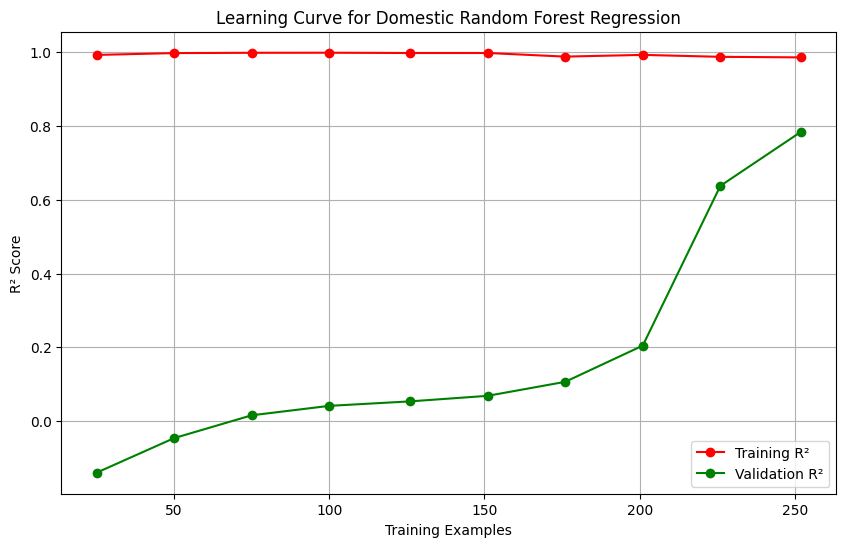

In [35]:
train_sizes, train_scores, val_scores = learning_curve(
    rf_model_D, df[features_D], df[target_pax_D],
    cv=cv_folds, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training R²")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation R²")
plt.title("Learning Curve for Domestic Random Forest Regression")
plt.xlabel("Training Examples")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

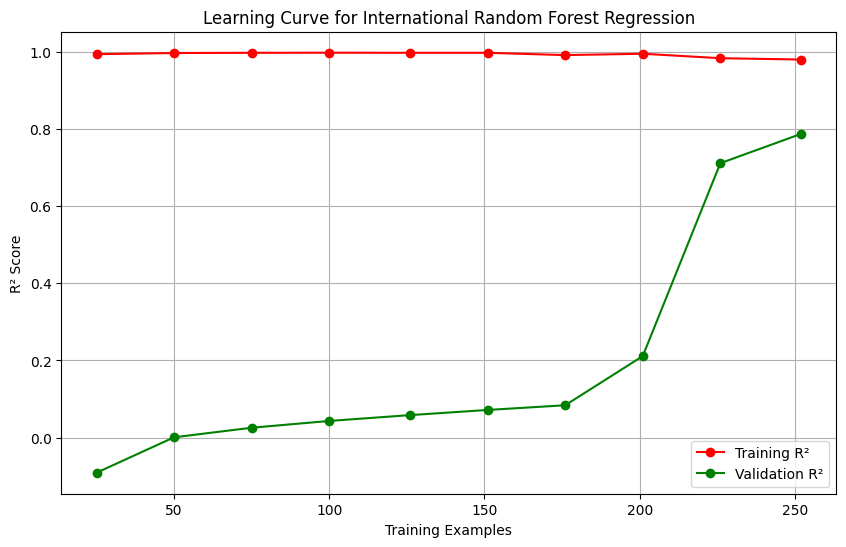

In [36]:
train_sizes, train_scores, val_scores = learning_curve(
    rf_model_I, df[features_I], df[target_pax_I],
    cv=cv_folds, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training R²")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation R²")
plt.title("Learning Curve for International Random Forest Regression")
plt.xlabel("Training Examples")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Residual Plot for the Domestic Model

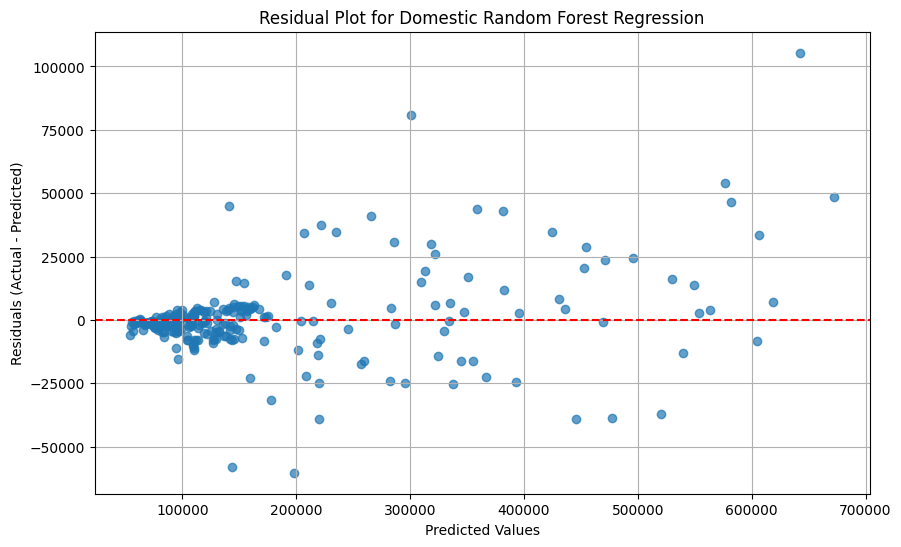

In [37]:
y_train_pred = rf_model_D.predict(X_train_D)
residuals = y_train_D - y_train_pred

plt.figure(figsize=(10,6))
plt.scatter(y_train_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot for Domestic Random Forest Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

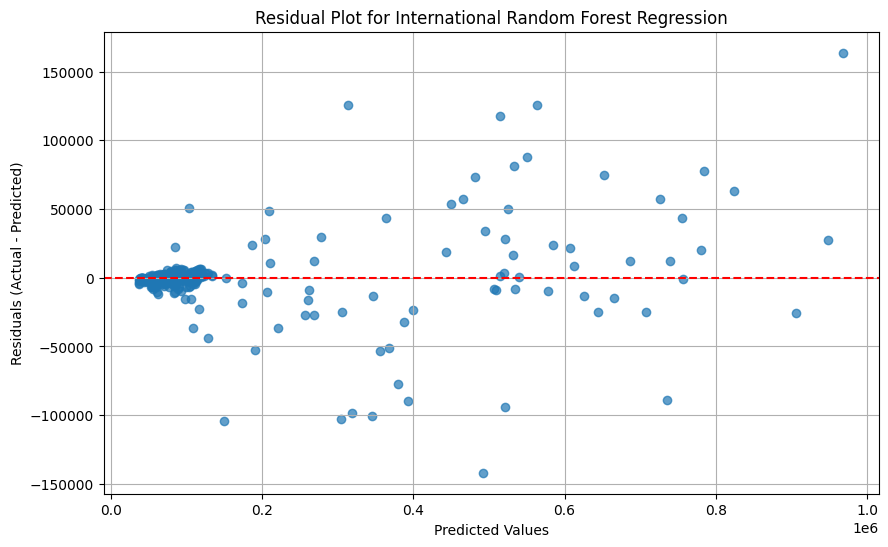

In [38]:
y_train_pred = rf_model_I.predict(X_train_I)
residuals = y_train_I - y_train_pred

plt.figure(figsize=(10,6))
plt.scatter(y_train_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot for International Random Forest Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

Optional - Interactive New Month Prediction

In [39]:
def interactive_prediction_rf():
    print("\n" + "="*50)
    print("INTERACTIVE NEW MONTH PREDICTION (Random Forest with Fixed Parameters)")
    print("="*50)
    try:
        avg_fare_D = float(input("Enter the Average Fare for Domestic (e.g. 27): "))
        avg_fare_I = float(input("Enter the Average Fare for International (e.g. 72): "))
        selling_prices = float(input("Enter Selling Prices (e.g. 103.13): "))
        capacities_D = float(input("Enter Capacities for Domestic (e.g. 99837.0): "))
        capacities_I = float(input("Enter Capacities for International (e.g. 110000.0): "))
        month_rank = float(input("Enter the Month's Rank (e.g. 10): "))
    except ValueError:
        print("Invalid input. Please enter numerical values.")
        return

    new_features_D = pd.DataFrame([[avg_fare_D, selling_prices, capacities_D, month_rank]],
                                  columns=features_D)
    new_features_I = pd.DataFrame([[avg_fare_I, selling_prices, capacities_I, month_rank]],
                                  columns=features_I)

    pred_pax_D = rf_model_D.predict(new_features_D)[0]
    pred_pax_I = rf_model_I.predict(new_features_I)[0]

    print("\n--- Prediction Results ---")
    print(f"Predicted Domestic Passengers (pax_D): {pred_pax_D:.0f}")
    print(f"Predicted International Passengers (pax_I): {pred_pax_I:.0f}")

interactive_prediction_rf()


INTERACTIVE NEW MONTH PREDICTION (Random Forest with Fixed Parameters)

--- Prediction Results ---
Predicted Domestic Passengers (pax_D): 75660
Predicted International Passengers (pax_I): 47419
